## California 房价预测回归任务

### 1. 加载训练、测试数据并标准化训练数据

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 加载数据
california = fetch_california_housing(as_frame=True)
x = california.data.values
y = california.target.values

# 划分 80% 的训练集和 20 % 测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# 训练集标准化
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)


### 2. 使用传统机器学习算法（线性回归、支持向量回归、决策树）训练，将均方误差、决定系数和运行时间作为评价标准

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import time
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'SVR': SVR()
}

results = {}
for name, model in models.items():
    start_time = time.time()
    model.fit(x_train_scaled, y_train)
    elapsed_time1 = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(x_test_scaled)
    elapsed_time2 = time.time() - start_time
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    results[name] = (mse, r2, elapsed_time1, elapsed_time2)
results

{'Linear Regression': (0.5289841670367208,
  0.5943232652466204,
  0.005054473876953125,
  0.0006020069122314453),
 'Decision Tree': (0.532076302852907,
  0.5919519134378293,
  0.14556884765625,
  0.0009133815765380859),
 'SVR': (0.3309119825302841,
  0.7462243656257972,
  9.193125247955322,
  2.305111885070801)}

### 3. 使用 Keras 训练神经网络，并进行预测，计算其误差

这里构建了一个简单的3层全连接层的神经网络

In [3]:
# Keras 神经网络建模与训练
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))

nn_model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')]
)

start_time = time.time()
history = nn_model.fit(
    x_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)
elapsed_time1 = time.time() - start_time

start_time = time.time()
y_pred = nn_model.predict(x_test_scaled).flatten()
elapsed_time2 = time.time() - start_time

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
elapsed_time = time.time() - start_time

# 添加神经网络结果到 results 字典
results['Neural Network'] = (mse, r2, elapsed_time1, elapsed_time2)

Epoch 1/100


2025-06-17 07:01:19.339770: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-17 07:01:19.774344: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22301 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:41:00.0, compute capability: 8.6


 78/413 [====>.........................] - ETA: 0s - loss: 1.3038 - rmse: 1.1418

2025-06-17 07:01:20.856399: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


413/413 [==============================] - 2s 3ms/step - loss: 0.5732 - rmse: 0.7571 - val_loss: 0.4539 - val_rmse: 0.6737
Epoch 2/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3662 - rmse: 0.6051 - val_loss: 0.3372 - val_rmse: 0.5807
Epoch 3/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3585 - rmse: 0.5987 - val_loss: 0.3623 - val_rmse: 0.6019
Epoch 4/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3827 - rmse: 0.6186 - val_loss: 0.3069 - val_rmse: 0.5540
Epoch 5/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3376 - rmse: 0.5811 - val_loss: 0.3218 - val_rmse: 0.5673
Epoch 6/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3221 - rmse: 0.5675 - val_loss: 0.2974 - val_rmse: 0.5453
Epoch 7/100
413/413 [==============================] - 1s 2ms/step - loss: 0.3333 - rmse: 0.5773 - val_loss: 0.3088 - val_rmse: 0.5557
Epoch 8/100
413/413 [==============================] - 1s 2ms/step 

### 4. 机器学习算法性能对比
从本次实验结果来看，神经网络在预测本类问题（包含复杂的非线性关系的问题）时，准确性方面表现最佳。它取得了最低的均方误差和最高的决定系数。然而，它的训练时间也是最长的。在传统机器学习算法中，支持向量回归（SVR） 展现出不错的准确性，但其在预测阶段的计算耗时相对较长。相比之下，线性回归和决策树模型虽然运行速度极快，但在预测性能上则显得相对较弱。

从训练时间和运行时间上来看，各模型之间存在巨大差异。线性回归和决策树只需要极短的训练时间。SVR的训练时间相较前两者显著增加。神经网络因为训练过程通常涉及多次迭代和复杂的反向传播计算，训练时间最长，远大于传统机器学习算法，这对于那些需要快速迭代的应用场景而言，使用可能受限。

                        MSE        R2  Train_Time  Calculate_Time
Linear Regression  0.528984  0.594323    0.005054        0.000602
Decision Tree      0.532076  0.591952    0.145569        0.000913
SVR                0.330912  0.746224    9.193125        2.305112
Neural Network     0.299476  0.770332   65.749367        0.137618


/tmp/ipykernel_2507/281633513.py:19: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_2507/281633513.py:26: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_2507/281633513.py:40: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


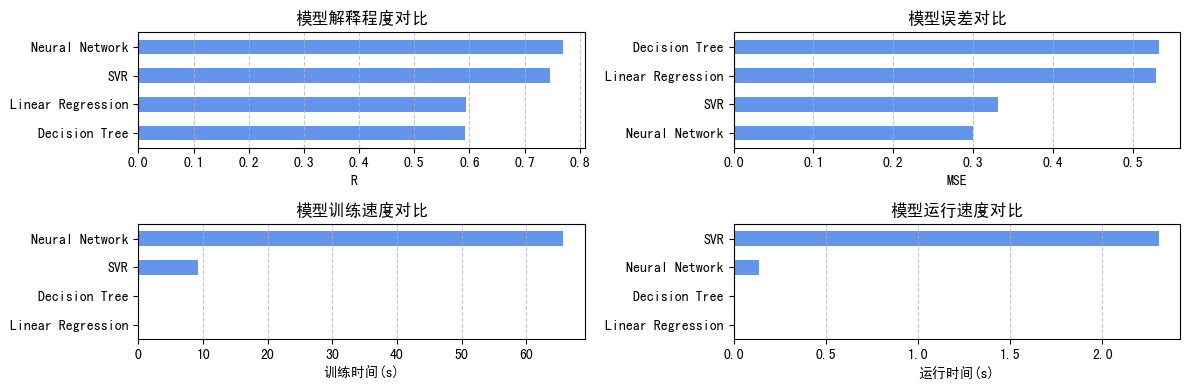

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS', 'WenQuanYi Zen Hei', 'Noto Sans CJK JP', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False
df_results = pd.DataFrame.from_dict(
    {k: {'MSE': v[0], 'R2': v[1], 'Train_Time': v[2], 'Calculate_Time': v[3]} for k, v in results.items()},
    orient='index'
)
print(df_results)

plt.figure(figsize=(12, 4))

plt.subplot(2, 2, 1)
df_results['R2'].sort_values(ascending=True).plot(kind='barh', color='cornflowerblue')
plt.xlabel('R²')
plt.title('模型解释程度对比')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.subplot(2, 2, 2)
df_results['MSE'].sort_values(ascending=True).plot(kind='barh', color='cornflowerblue')
plt.xlabel('MSE')
plt.title('模型误差对比')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.subplot(2, 2, 3)
df_results['Train_Time'].sort_values(ascending=True).plot(kind='barh', color='cornflowerblue')
plt.xlabel('训练时间(s)')
plt.title('模型训练速度对比')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.subplot(2, 2, 4)
df_results['Calculate_Time'].sort_values(ascending=True).plot(kind='barh', color='cornflowerblue')
plt.xlabel('运行时间(s)')
plt.title('模型运行速度对比')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 5. 特征建模与算法选择总结
从数据预处理要求上来说，神经网络、SVR和线性回归算法对量纲、局部异常敏感，在进行训练、预测之前，应该要将数据标准化，且小部分异常值和缺失值可能会对模型最终预测结果造成较大影响。而对于决策树，它对特征进行分段，以此来拟合目标，不依赖于样本在特征空间的分布特征，部分异常样本最多导致出现多余分支，但是对最终模型的预测性能较小，因此对数据预处理的要求较低。

从问题建模和算法选择上来说，不同算法对变量之间关系的假设是不同的，应先对问题进行建模，确定变量之间关系的假设，再使用符合问题假设的算法进行预测。

线性回归假设数据在特征空间中呈线性分布，以此进行拟合，但是对于需要更复杂的非线性特征交互问题，该算法就显得力不从心；SVR 将数据映射到更高维空间以捕捉更复杂的特征交互，但是如果数据分类边界及其尖锐，该模型可能并不能很好的完成任务，同时对于高维稀疏向量（文本处理 TF–IDF）的情况，大量的零值也会对模型性能造成影响；决策树可以处理有着尖锐分类边界的分类任务，但是同样对于特征之间复杂关系的解释能力有限。如果样本中出现大量噪声也会导致过度分割等问题；神经网络通过引入非线性激活函数来拟合复杂特征交互，但是其中参数之间的相互作用难以直观的表示出来，为了达成特定目标，可能需要大幅改动模型结构超参数，对使用者的经验要求较高。

在本问题中，输出房价和各个参数之间的联系显然不能用简单的线性关系来表示，属于难以直观表示的复杂特征交互，所以使用 SVR 和 神经网络得到了比较好的效果。